In [1]:

### 2023 not on API yet

from __future__ import print_function
import os
import time
import cfbd
import pandas as pd 

from cfbd.rest import ApiException
from pprint import pprint
from tqdm import tqdm

from dotenv import load_dotenv

load_dotenv()

# # Configure API key authorization: ApiKeyAuth
# configuration = cfbd.Configuration()
# configuration.api_key['Authorization'] = os.getenv('CFBD_API')
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# api_instance = cfbd.RatingsApi(cfbd.ApiClient(configuration))

# years = list(range(2013, 2024))
# years = [2022]
# calendars_master = []
# for year in years:
#     try:
#         # Season calendar
#         api_response = api_instance.get_sp_ratings(year=year)
#         pprint(api_response)
#     except ApiException as e:
#         print("Exception when calling GamesApi->get_calendar: %s\n" % e)


True



### Watch Sentdex GZip compression distance video for more explanation

-basically, compress two text blurbs with gzip  
-add those compressions together  
-in theory, if they are similar, then the ncd function below will show a small distance  
-then use k nearest neighbors regressor to classify  


In [2]:

## just copy/pasted from web
def clean_download():
    
    return

sp = pd.read_csv('data/SP+_2023_preseason.csv')
sp['TEAM'] = sp['TEAM'].apply(lambda x: x[x.find('.')+1:].strip())
sp['team_match'] = sp['TEAM'].copy().str.replace(' ','_').str.lower()

sp



,TEAM,SP+,OFF. SP+,DEF. SP+,team_match
0,Georgia,29.9,41.9 (9),11.9 (3),georgia
1,Ohio St.,29.6,46.4 (2),16.7 (13),ohio_st.
2,Michigan,29.2,42.0 (7),12.9 (4),michigan
3,Alabama,27.9,44.2 (5),16.3 (10),alabama
4,LSU,25.2,41.6 (10),16.4 (12),lsu
...,...,...,...,...,...
128,UL-Monroe,-19.6,18.6 (106),38.1 (126),ul-monroe
129,Akron,-19.6,18.1 (109),37.7 (124),akron
130,UMass,-21.7,11.0 (130),32.7 (101),umass
131,New Mexico,-21.7,12.2 (129),33.9 (107),new_mexico


In [3]:



matches = [file.replace('.txt','') for file in os.listdir('data/Bill_C')]

sp['team_match'] = sp['team_match'].copy().str.replace('st.','state', regex=False)

translate_map = {
    'miss._state':'mississippi_st',
    'n._carolina':'north_carolina',
    's._carolina':'south_carolina',
    'california':'cal',
    'w._virginia':'west_virginia',
    'wash._state':'washington_state',
    'va._tech':'virginia_tech',
    'ga._tech':'georgia_tech',
    's._alabama':'south_alabama',
    'boston_coll.':'boston_college',
    'coastal_caro.':'coastal_carolina',
    'app._state':'app_state',
    'jmu':'james_madison',
    'wku':'western_kentucky',
    'n._texas':'north_texas',
    'so._miss':'southern_miss',
    'ga._southern':'georgia_southern',
    'miami-oh':'miami_oh',
    'mtsu':'middle_tennessee',
    'emu':'eastern_michigan',
    'usf':'south_florida',
    'la._tech':'la_tech',
    'cmu':'central_michigan',
    'niu':'northern_illinois',
    'odu':'old_dominion',
    'wmu':'western_michigan',
    'sam_houston':'sam_houston_st',
    'nmsu':'new_mexico_st',
    "j'ville_state":'jacksonville_st',
    'bgsu':'bowling_green',
    'ul-monroe':'louisiana_monroe'
}




In [4]:

sp['team_match'] = sp['team_match'].apply(lambda x: translate_map.get(x) if x in translate_map else x)
sp['have_match'] = sp['team_match'].copy().isin(matches)
# sp.loc[sp['have_match']==False]


In [5]:
sp['file_path'] = sp['team_match'].copy().apply(lambda x: f"data/Bill_C/{x}.txt")
sp

,TEAM,SP+,OFF. SP+,DEF. SP+,team_match,have_match,file_path
0,Georgia,29.9,41.9 (9),11.9 (3),georgia,True,data/Bill_C/georgia.txt
1,Ohio St.,29.6,46.4 (2),16.7 (13),ohio_state,True,data/Bill_C/ohio_state.txt
2,Michigan,29.2,42.0 (7),12.9 (4),michigan,True,data/Bill_C/michigan.txt
3,Alabama,27.9,44.2 (5),16.3 (10),alabama,True,data/Bill_C/alabama.txt
4,LSU,25.2,41.6 (10),16.4 (12),lsu,True,data/Bill_C/lsu.txt
...,...,...,...,...,...,...,...
128,UL-Monroe,-19.6,18.6 (106),38.1 (126),louisiana_monroe,True,data/Bill_C/louisiana_monroe.txt
129,Akron,-19.6,18.1 (109),37.7 (124),akron,True,data/Bill_C/akron.txt
130,UMass,-21.7,11.0 (130),32.7 (101),umass,True,data/Bill_C/umass.txt
131,New Mexico,-21.7,12.2 (129),33.9 (107),new_mexico,True,data/Bill_C/new_mexico.txt


In [6]:

import gzip
from sklearn.neighbors import KNeighborsRegressor

with open('data/Bill_C/michigan.txt','rb') as f:
    test = f.read()
    


In [7]:
test_compressed = gzip.compress(test)
test_compressed

b'\x1f\x8b\x08\x00\xe5\xeb\xd3d\x02\xffmW\xcbn\xdd6\x10\xdd\x17\xe8?\xcc&\x88\r\\\x1b\xf6M\x9c\xa2\xed\xa2\x88\x9d4\xa9\xd14E_YS\xe2\\\x89\xb9\x12\xa9\xf2aE\xdf\xd6E?\xa9\xbf\xd03C\xc9q\x9a\x02AbS\xe4p\xe6\xcc9g\x98\x7f\xfe\xfa\xfb]\x1f\x88\xbdMT&\n\x9er\x98(\xf7.Qv#\x93\xf3\xd4\x86a\xe0\x8e\xe9\x10Bn\xcc0<N4\x86\x94\xc9\x8dS\x88\xd9\xf8Lm\x89\x91\xf1otwf\x88\xcbw\xf4C\xc6&\xe7\xdb\xc8\xd65\x03S\x1f\xe6\xf5\xa3c\x9c6\x9dw\x87\x85\xf8\x8e\xe3\x82\xab|G]\x08\x96\x8c\xb7\xd4\x18{N\xbf\xf5L\r\xe7\xcc\x91\x9a\x90{\xcal\xc6D&\xf2\x0e\x99!\x9a\xebz|\x92\x1fS6GD\x94\x93\xf2k\xe3\xban\xfdb]2\xd3\x14\x9c\xcf\xa3\xa4v"[B\xdb\x9a\xe4\x827\x03\xb9\x18M\xd6\x1f]^NQ[\xa4\xb9\x0f\x92\x11\r!q:\xff\xf2\x8b[7\xd2k\x13\x1bS\xba\x1e\xe5\x1c\\D\xd1\x07w\x87[\xd9\xa4\xe0qm\xa27\xaeE:\xc6cC\xcf\xc6\x02,\xd3\xf64sd$E\xc5[\xf6\xce\x08\x04\xa9\xb4-\xa7T\x8b{\x17\x06\xdc\xe4<R\xefq\xe8\xe0\xbcK=[A[r\x7f\xfe\xb3va\x7f\x81~\xb4\xda\x83\xe4>\xd0\xc2&&\xe0\x82\\\x05\x03\x01D1\xddi\xf986\x154\nA2\x85\xc3\x01%\x95\xa8=

In [8]:

teams = set(sp['TEAM'].unique())
team_blurbs = {
    
}

for index,row in tqdm(sp.iterrows(),total=len(sp)):
    with open(row['file_path'],'r') as f:
        blurb = f.read()
        
    ## actually need the original blurb
#     blurb_compress = gzip.compress(blurb)
    team_blurbs[row['TEAM']] = {}
    team_blurbs[row['TEAM']]['blurb'] = blurb
    team_blurbs[row['TEAM']]['target'] = row['SP+']
    
    


100%|██████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<00:00, 3241.23it/s]


In [9]:

def ncd(x1_blurb, x2_blurb):
    x1_comp = gzip.compress(x1_blurb.encode())
    x2_comp = gzip.compress(x2_blurb.encode())
    x1_comp_len = len(x1_comp)
    x2_comp_len = len(x2_comp)
    joined_len = len(gzip.compress(" ".join([x1_blurb, x2_blurb]).encode()))
    return (joined_len - min(x1_comp_len,x2_comp_len))/max(x1_comp_len,x2_comp_len)

## should be very close
print(ncd(team_blurbs['S. Alabama']['blurb'], team_blurbs['Troy']['blurb']))

## should be very far
print(ncd(team_blurbs['Alabama']['blurb'], team_blurbs['UMass']['blurb']))



0.35709436524100474
0.8929395477618828


In [10]:
## crekl 
train_X = []
opp_blurbs = team_blurbs.copy()
team_order = []
targets = []
for k,v in team_blurbs.items():
    team_row=[]
    team_order.append(k)
    targets.append(v['target'])
    for k2, v2 in opp_blurbs.items():
        team_row.append(ncd(v['blurb'], v2['blurb']))
        
    train_X.append(team_row)


In [11]:

from sklearn.model_selection import cross_val_predict, cross_val_score, KFold



In [12]:

## 10 diff data splits
pred_df = pd.DataFrame({
    'team':team_order,
    'ratings':targets
})
scores = []
for i in tqdm(range(10)):
    cv = KFold(random_state=17+i, shuffle=True, n_splits=10)
    reg = KNeighborsRegressor(n_neighbors=7)
    y_pred = cross_val_predict(reg, train_X, targets, cv=cv)
    reg = KNeighborsRegressor(n_neighbors=7)
    score = cross_val_score(reg, train_X, targets, cv=cv, scoring='neg_mean_squared_error')
    pred_df[f'pred_{i+1}'] = y_pred
    scores.append(score)
    
    


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.43it/s]


In [13]:

import numpy as np
baseline_mse = np.mean(pred_df['ratings'].copy()**2)
print(baseline_mse)


189.173007518797


In [14]:
# 6: -95.21
# 7: -93.78
# 8: -95.12
print(np.mean(scores))


-93.77869467369365


In [15]:

pred_df['final_prediction'] = pred_df[[f'pred_{i}' for i in range(1,11)]].mean(axis=1)



In [16]:

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = os.getenv('CFBD_API')
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)


In [17]:

teams_api = cfbd.TeamsApi(api_config)
team_info = teams_api.get_fbs_teams()


In [19]:

team_logo_dict = {}
team_color_dict = {}
for v in team_info:
    team_logo_dict[v.school] = v.logos[0]
    team_color_dict[v.school] = v.color

In [20]:

cfbd_translate = {
    'Miss. State':'Mississippi State',
    'N. Carolina':'North Carolina',
    'S. Carolina':'South Carolina',
    'W. Virginia':'West Virginia',
    'UTSA':'UT San Antonio',
    'Va. Tech':'Virginia Tech',
    'Ga. Tech':'Georgia Tech',
    'S. Alabama':'South Alabama',
    'Boston Coll.':'Boston College',
    'Coastal Caro.':'Coastal Carolina',
    'App. State':'Appalachian State',
    'JMU':"James Madison",
    'FAU':'Florida Atlantic',
    'WKU':"Western Kentucky",
    'SDSU':"San Diego State",
    'N. Texas':'North Texas',
    'Ga. Southern':'Georgia Southern',
    'ECU':"East Carolina",
    'So. Miss':'Southern Mississippi',
    'SJSU':'San José State',
    'Wash. State':'Washington State',
    'Miami-OH': 'Miami (OH)',
    'MTSU':'Middle Tennessee',
    'EMU':"Eastern Michigan",
    'USF':'South Florida',
    'La. Tech':'Louisiana Tech',
    'CMU':"Central Michigan",
    'NIU':"Northern Illinois",
    'UConn':'Connecticut',
    'ODU':"Old Dominion",
    'WMU':'Western Michigan',
    'Sam Houston':'Sam Houston State',
    'NMSU':'New Mexico State',
    "J'ville State":'Jacksonville State',
    'Hawaii':"Hawai'i",
    'BGSU':'Bowling Green',
    'FIU':"Florida International",
    'UL-Monroe':'Louisiana Monroe'
    
}


In [21]:
pred_df['cfbd_team'] = pred_df['team'].copy().str.strip()
pred_df['cfbd_team'] = pred_df['cfbd_team'].str.replace('St.','State',regex=False)
pred_df['cfbd_team'] = pred_df['cfbd_team'].apply(lambda x: cfbd_translate[x] if x in cfbd_translate else x)
pred_df['logo'] = pred_df['cfbd_team'].apply(lambda x: team_logo_dict.get(x))

In [23]:
import urllib
import PIL
import os

In [24]:
import time
import requests 

## downloading logos, only have to do once

# for index, row in pred_df.iterrows():
#     team = row['cfbd_team']
#     logo_path = row['logo']
#     local_path = os.path.join('data/logos',f'{team}.png')
#     with open(local_path, 'wb') as f:
#         f.write(requests.get(logo_path).content)
#     time.sleep(0.25)
    

In [25]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=0.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

getImage('data/logos/Georgia.png')


In [26]:

pred_df['local_path'] = pred_df['cfbd_team'].copy().apply(lambda x: os.path.join('data/logos',f'{x}.png'))


In [27]:

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
x = pred_df['final_prediction'].copy().values.reshape(-1,1)
y = pred_df['ratings'].copy().values.reshape(-1,1)
model.fit(x, y)


LinearRegression()

In [28]:
xrange = np.linspace(-17.5, 25).reshape(-1,1)
model_pred = model.predict(xrange)

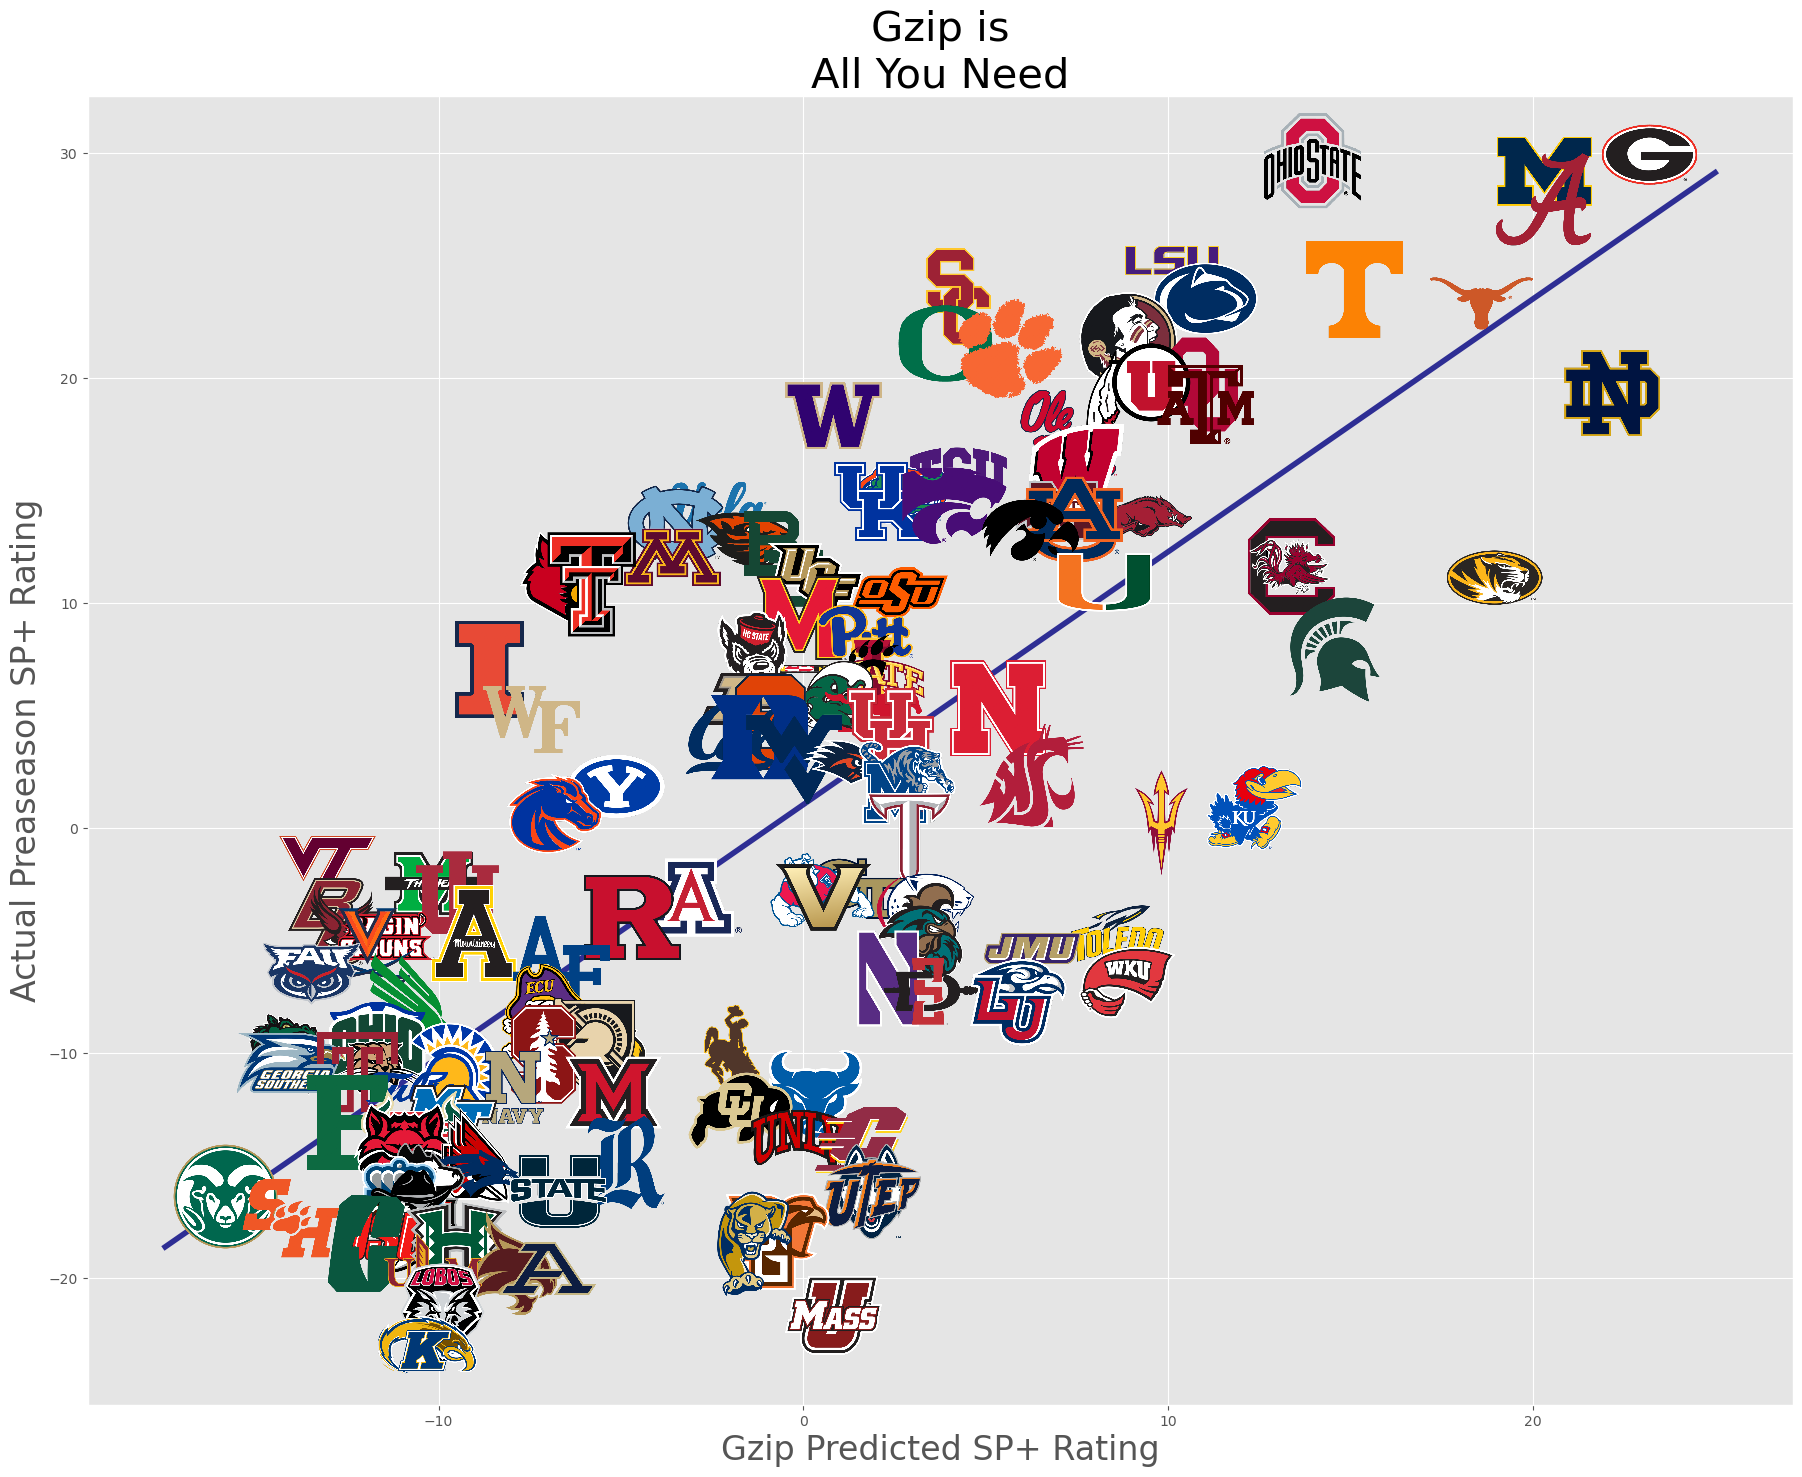

In [34]:
plt.style.use('ggplot')

paths = pred_df['local_path'].copy()
fig, ax = plt.subplots(figsize=(22,17))
x = pred_df['final_prediction'].copy()
y = pred_df['ratings'].copy()
ax.plot(xrange, model_pred, color='navy', alpha=0.8, linewidth=4)
ax.scatter(x, y, alpha=0)
ax.set_xlabel("Gzip Predicted SP+ Rating", fontsize=24)
ax.set_ylabel("Actual Preaseason SP+ Rating", fontsize=24)
ax.set_title("Gzip is\nAll You Need", fontsize=30)
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.savefig('data/output/gzip_ayn.png')
    

In [30]:

pred_df['GZIP_rel'] = pred_df['final_prediction'].copy()-pred_df['ratings'].copy()






In [31]:
pred_df['color'] = pred_df['cfbd_team'].map(team_color_dict)
pred_df

,team,ratings,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,final_prediction,cfbd_team,logo,local_path,GZIP_rel,color
0,Georgia,29.9,24.414286,22.500000,24.414286,22.442857,20.742857,24.414286,24.414286,20.514286,23.314286,24.785714,23.195714,Georgia,http://a.espncdn.com/i/teamlogos/ncaa/500/61.png,data/logos\Georgia.png,-6.704286,#CC0000
1,Ohio St.,29.6,11.114286,12.985714,11.114286,15.457143,16.157143,17.257143,13.900000,16.157143,12.985714,12.414286,13.954286,Ohio State,http://a.espncdn.com/i/teamlogos/ncaa/500/194.png,data/logos\Ohio State.png,-15.645714,#DE3121
2,Michigan,29.2,19.614286,20.914286,20.914286,19.614286,20.985714,20.914286,20.914286,20.914286,19.614286,18.800000,20.320000,Michigan,http://a.espncdn.com/i/teamlogos/ncaa/500/130.png,data/logos\Michigan.png,-8.880000,#00274c
3,Alabama,27.9,22.085714,19.214286,22.085714,22.085714,22.085714,19.214286,18.842857,22.085714,16.871429,18.342857,20.291429,Alabama,http://a.espncdn.com/i/teamlogos/ncaa/500/333.png,data/logos\Alabama.png,-7.608571,#690014
4,LSU,25.2,11.657143,10.214286,10.214286,11.657143,11.657143,8.428571,11.657143,11.657143,6.771429,7.457143,10.137143,LSU,http://a.espncdn.com/i/teamlogos/ncaa/500/99.png,data/logos\LSU.png,-15.062857,#fdd023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,UL-Monroe,-19.6,-10.114286,-10.114286,-10.114286,-9.471429,-9.471429,-10.114286,-11.200000,-9.585714,-11.185714,-10.114286,-10.148571,Louisiana Monroe,http://a.espncdn.com/i/teamlogos/ncaa/500/2433...,data/logos\Louisiana Monroe.png,9.451429,#231F20
129,Akron,-19.6,-7.114286,-7.114286,-6.428571,-7.114286,-7.114286,-7.700000,-7.114286,-7.114286,-7.114286,-6.328571,-7.025714,Akron,http://a.espncdn.com/i/teamlogos/ncaa/500/2006...,data/logos\Akron.png,12.574286,#00285e
130,UMass,-21.7,2.557143,-1.228571,1.442857,1.442857,-2.057143,1.442857,1.442857,2.371429,1.442857,-0.700000,0.815714,UMass,http://a.espncdn.com/i/teamlogos/ncaa/500/113.png,data/logos\UMass.png,22.515714,#880007
131,New Mexico,-21.7,-9.400000,-9.400000,-10.642857,-10.342857,-9.414286,-11.157143,-10.242857,-9.400000,-8.871429,-10.242857,-9.911429,New Mexico,http://a.espncdn.com/i/teamlogos/ncaa/500/167.png,data/logos\New Mexico.png,11.788571,#000000


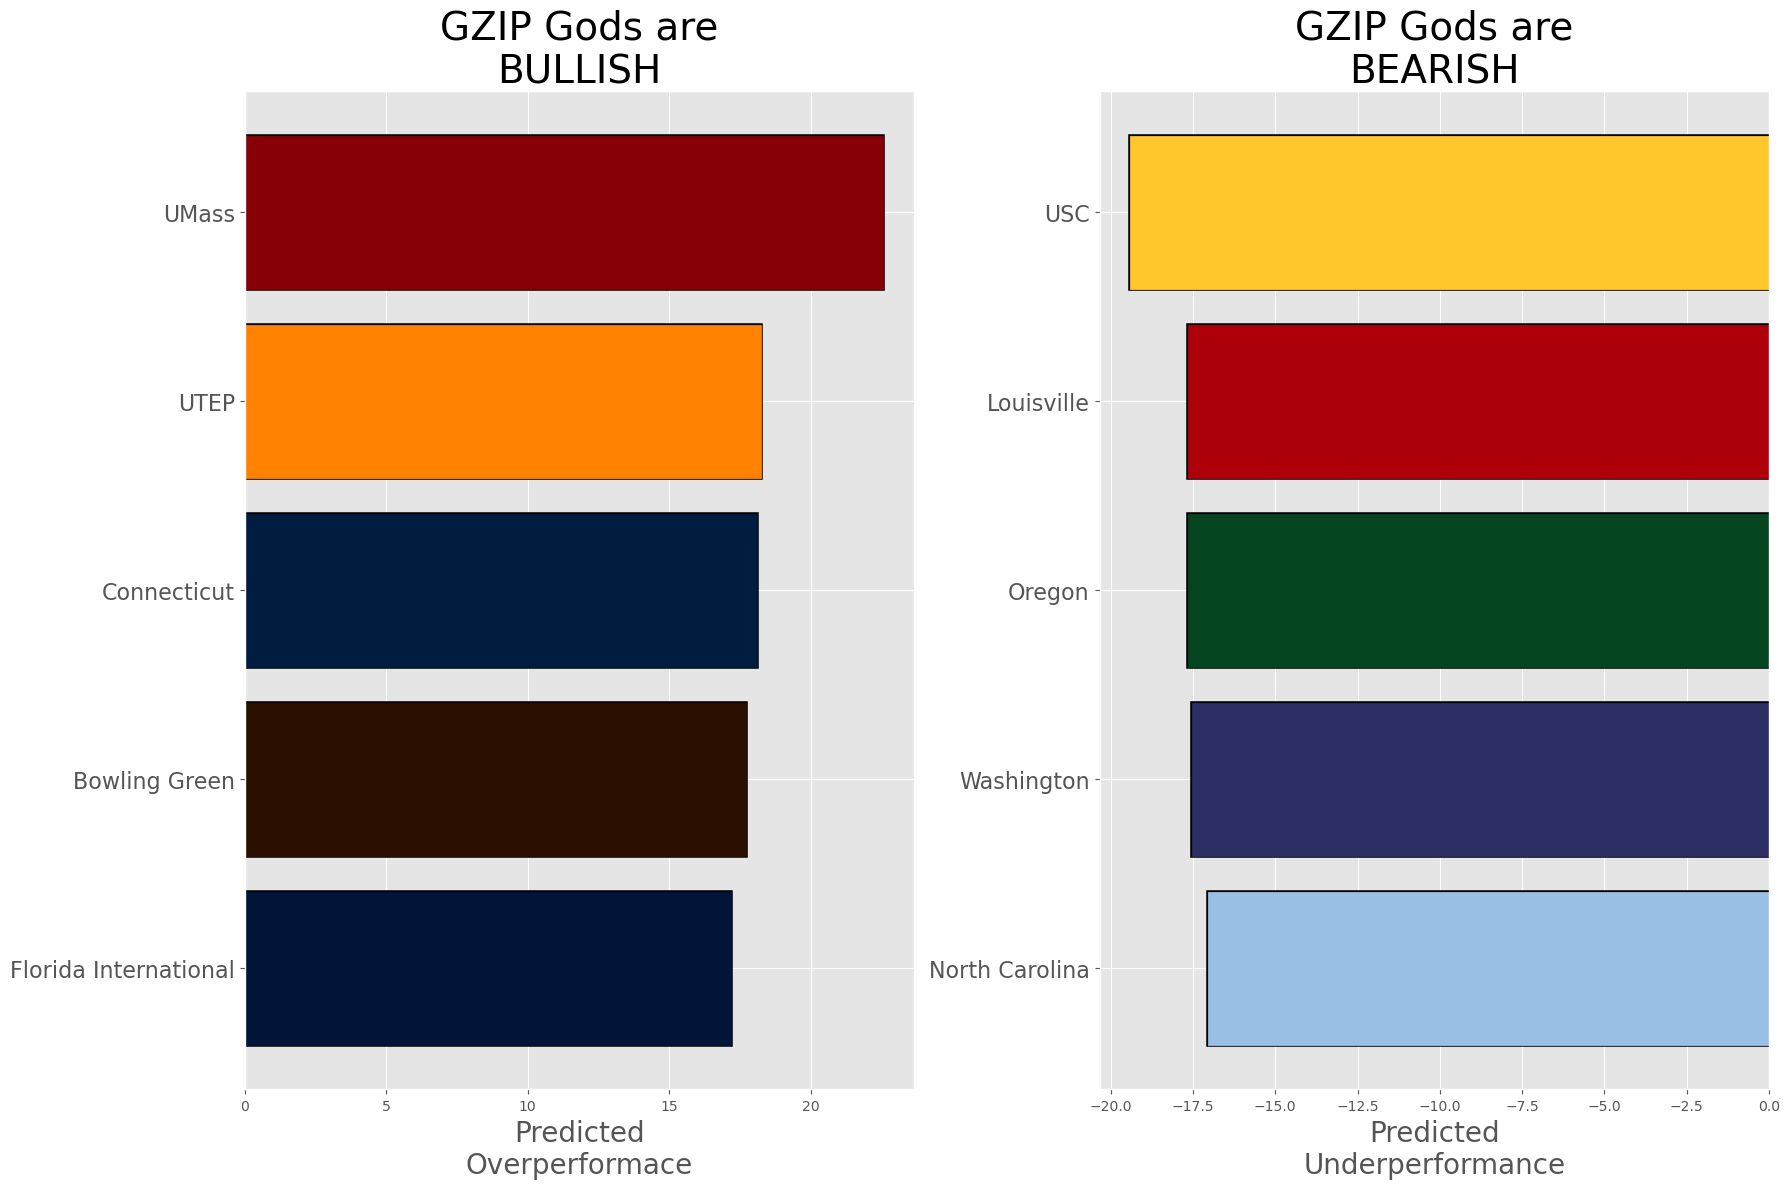

In [32]:
import random

fig, axes = plt.subplots(1, 2, figsize=(18, 12))
ax1 = axes[0]
ax2 = axes[1]
y_pos = np.ones(5)*5-range(5)
bulls = pred_df.sort_values(by='GZIP_rel',ascending=False).head()
ax1.set_yticks(y_pos, labels=bulls.cfbd_team, fontsize=16)
bears = pred_df.sort_values(by='GZIP_rel').head()
ax1.barh(y_pos, bulls.GZIP_rel, align='center',edgecolor='k',linewidth=4)
bull_bars = ax1.barh(y_pos, bulls.GZIP_rel, align='center',edgecolor='k',linewidth=2)
ax1.set_xlabel("Predicted\nOverperformace",fontsize=20)
for i in range(5):
    bull_bars[i].set_color(bulls.iloc[i]['color'])
ax1.set_title("GZIP Gods are\nBULLISH",fontsize=28)
ax2.set_yticks(y_pos, labels=bears.cfbd_team, fontsize=16)
ax2.barh(y_pos, bears.GZIP_rel, align='center',edgecolor='k',linewidth=4)
bear_bars = ax2.barh(y_pos, bears.GZIP_rel, align='center',edgecolor='k',linewidth=2)
ax2.set_xlabel("Predicted\nUnderperformance",fontsize=20)
ax2.set_title("GZIP Gods are\nBEARISH",fontsize=28)
for i in range(5):
    bear_bars[i].set_color(bears.iloc[i]['color'])
fig.tight_layout()
plt.savefig('data/output/gzip_bull_bear.png')
plt.show()
